In [79]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from scipy import stats
import statistics
from math import sqrt
from sklearn.preprocessing import StandardScaler
print("hello")

hello


In [80]:
df = pd.read_csv("marketing.csv")
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [81]:
df1 = pd.get_dummies(df)
df1.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
0,10,142.44,1,0,0,0,0,1,0,0,1,0,1,0,0
1,6,329.08,1,1,1,0,1,0,0,0,0,1,0,0,1
2,7,180.65,0,1,1,0,0,1,0,0,0,1,1,0,0
3,9,675.83,1,0,1,0,1,0,0,0,0,1,0,1,0
4,2,45.34,1,0,0,0,0,0,1,0,0,1,1,0,0


In [82]:
df1["conversion"].value_counts()

0    54606
1     9394
Name: conversion, dtype: int64

In [83]:
#conversion rate
9394 / 64000

0.14678125

In [84]:
c = df1.loc[df1['conversion'] == 1]

In [85]:
c.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer
5,6,134.83,0,1,0,1,0,1,0,0,1,0,1,0,0
10,7,548.91,0,1,1,1,0,0,1,0,1,0,1,0,0
13,2,101.64,0,1,0,1,0,0,1,0,0,1,0,1,0
15,3,58.13,1,0,1,1,0,0,1,0,0,1,0,0,1
22,2,118.40,1,0,0,1,0,1,0,0,0,1,0,1,0


In [86]:
c["offer_Buy One Get One"].value_counts()

0    6156
1    3238
Name: offer_Buy One Get One, dtype: int64

In [87]:
3238 / 9394

0.34468809878645945

In [88]:
c["offer_Discount"].value_counts()

0    5500
1    3894
Name: offer_Discount, dtype: int64

In [89]:
3894 / 9394

0.41451990632318503

In [90]:
c["offer_No Offer"].value_counts()

0    7132
1    2262
Name: offer_No Offer, dtype: int64

In [91]:
2262 / 9394

0.24079199489035555

In [92]:
#all offers
(3894 + 3238) / 9394

0.7592080051096445

In [93]:
no_c = df1.loc[df1['conversion'] == 0]

In [94]:
no_c["offer_Buy One Get One"].value_counts()

0    36457
1    18149
Name: offer_Buy One Get One, dtype: int64

In [95]:
18149+3238

21387

In [96]:
#percent bought with bogo offer
3238 / 21387

0.151400383410483

In [97]:
no_c["offer_Discount"].value_counts()

0    37193
1    17413
Name: offer_Discount, dtype: int64

In [98]:
17413 + 3894

21307

In [99]:
#percent bought with discount offer
3894 / 21307

0.18275684047496127

In [100]:
no_c["offer_No Offer"].value_counts()

0    35562
1    19044
Name: offer_No Offer, dtype: int64

In [101]:
19044 + 2262

21306

In [102]:
#percent bought w/ no offer
2262 / 21306

0.10616727682343002

In [103]:
df2 = df1.loc[df1["offer_Discount"] == 1]

In [104]:
df3 = df1.loc[df1["offer_No Offer"] == 1]

In [105]:
df4 = df2.append(df3)

In [106]:
X = df4.drop(columns=['conversion'])

In [107]:
y = df4["conversion"]

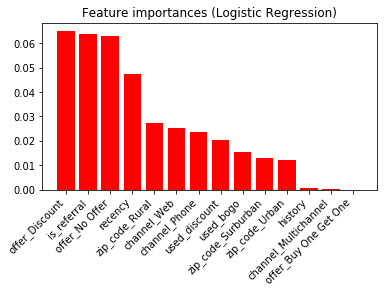

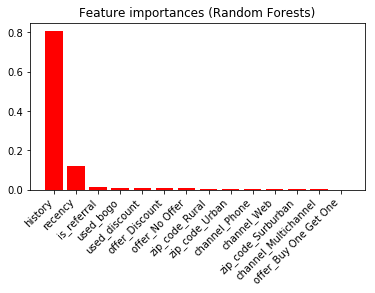

In [108]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt


clf = LogisticRegressionCV(max_iter=3000)
clf.fit(X, y)
coefs = np.abs(clf.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(14), coefs[indices[:14]],
       color="r", align="center")
plt.xticks(range(14), X.columns[indices[:14]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

clf = RandomForestClassifier(n_estimators=400) 
clf.fit(X, y)
coefs = clf.feature_importances_
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Random Forests)")
plt.bar(range(14), coefs[indices[:14]],
       color="r", align="center")
plt.xticks(range(14), X.columns[indices[:14]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)


plt.ion(); plt.show()

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
logreg = LogisticRegression()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
test = X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
result = logreg.fit(X_train, y_train)
result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
logreg = LogisticRegression()
result = logreg.fit(X_train, y_train)
result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
test = X_test

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [123]:
y_hats_df = pd.DataFrame(data = y_pred, columns = ['y_predict'], index = test.index.copy())
df_out = pd.merge(df4, y_hats_df, left_index = True, right_index = True)

In [124]:
df_out.head()

,recency,history,used_discount,used_bogo,is_referral,conversion,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,offer_Buy One Get One,offer_Discount,offer_No Offer,y_predict
13,2,101.64,0,1,0,1,0,0,1,0,0,1,0,1,0,1
16,5,29.99,1,0,0,0,0,1,0,0,1,0,0,1,0,0
22,2,118.40,1,0,0,1,0,1,0,0,0,1,0,1,0,1
26,12,115.39,0,1,0,1,0,1,0,0,1,0,0,1,0,0
27,6,162.98,0,1,0,0,0,1,0,0,0,1,0,1,0,1


In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[12276  2284]
 [ 1748   738]]


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.84      0.86     14560
          1       0.24      0.30      0.27      2486

avg / total       0.78      0.76      0.77     17046



In [127]:
prob = logreg.predict_proba(X_test)
prob

array([[0.81511862, 0.18488138],
       [0.57262351, 0.42737649],
       [0.79945111, 0.20054889],
       ...,
       [0.72411609, 0.27588391],
       [0.72512425, 0.27487575],
       [0.89385627, 0.10614373]])

In [128]:
y_prob_df = pd.DataFrame(data = prob, columns = ['LG_P_0', 'LG_P_1'], index = test.index.copy())
df_out = pd.merge(df_out, y_prob_df, left_index = True, right_index = True)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [130]:
y_pred = classifier.predict(X_test)

In [131]:
y_hats_df = pd.DataFrame(data = y_pred, columns = ['y_KNN'], index = df_out.index.copy())
df_out = pd.merge(df_out, y_hats_df, left_index = True, right_index = True)

In [133]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8358559192772498


In [134]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[14110   450]
 [ 2348   138]]


In [135]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.97      0.91     14560
          1       0.23      0.06      0.09      2486

avg / total       0.77      0.84      0.79     17046



In [136]:
prob = classifier.predict_proba(X_test)
prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [137]:
y_prob_df = pd.DataFrame(data = prob, columns = ['KNN_P_0', 'KNN_P_1'], index = test.index.copy())
df_out = pd.merge(df_out, y_prob_df, left_index = True, right_index = True)

In [138]:
clf = DecisionTreeClassifier()

In [139]:
clf = clf.fit(X_train,y_train)

In [140]:
y_pred = clf.predict(X_test)

In [141]:
y_hats_df = pd.DataFrame(data = y_pred, columns = ['y_TREE'], index = df_out.index.copy())
df_out = pd.merge(df_out, y_hats_df, left_index = True, right_index = True)

In [142]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7675114396339318


In [143]:
print(confusion_matrix(y_test, y_pred))

[[12683  1877]
 [ 2086   400]]


In [144]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.87      0.86     14560
          1       0.18      0.16      0.17      2486

avg / total       0.76      0.77      0.76     17046



In [145]:
prob = clf.predict_proba(X_test)

In [146]:
y_prob_df = pd.DataFrame(data = prob, columns = ['TREE_P_0', 'TREE_P_1'], index = test.index.copy())
df_out = pd.merge(df_out, y_prob_df, left_index = True, right_index = True)

In [147]:
clf = RandomForestClassifier(n_estimators=1000) 

In [148]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [149]:
y_pred = clf.predict(X_test)

In [150]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7989557667487974


In [151]:
print(confusion_matrix(y_test, y_pred))

[[13360  1200]
 [ 2227   259]]


In [152]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.92      0.89     14560
          1       0.18      0.10      0.13      2486

avg / total       0.76      0.80      0.78     17046



In [153]:
y_hats_df = pd.DataFrame(data = y_pred, columns = ['y_RF'], index = df_out.index.copy())
df_out = pd.merge(df_out, y_hats_df, left_index = True, right_index = True)

In [154]:
prob = clf.predict_proba(X_test)

In [155]:
y_prob_df = pd.DataFrame(data = prob, columns = ['RF_P_0', 'RF_P_1'], index = test.index.copy())
df_out = pd.merge(df_out, y_prob_df, left_index = True, right_index = True)

In [157]:
df_out.columns

Index(['recency', 'history', 'used_discount', 'used_bogo', 'is_referral',
       'conversion', 'zip_code_Rural', 'zip_code_Surburban', 'zip_code_Urban',
       'channel_Multichannel', 'channel_Phone', 'channel_Web',
       'offer_Buy One Get One', 'offer_Discount', 'offer_No Offer',
       'y_predict', 'LG_P_0', 'LG_P_1', 'y_KNN', 'KNN_P_0', 'KNN_P_1',
       'y_TREE', 'TREE_P_0', 'TREE_P_1', 'y_RF', 'RF_P_0', 'RF_P_1'],
      dtype='object')

In [170]:
new = df_out[['conversion', 'y_predict', 'y_KNN', 'y_TREE','y_RF','offer_Discount', 'offer_No Offer']].copy()

In [171]:
new.head()

,conversion,y_predict,y_KNN,y_TREE,y_RF,offer_Discount,offer_No Offer
13,1,1,0,0,0,1,0
16,0,0,0,0,0,1,0
22,1,1,0,0,0,1,0
26,1,0,0,0,0,1,0
27,0,1,0,1,1,1,0


In [172]:
new["conversion"].value_counts()

0    14560
1     2486
Name: conversion, dtype: int64

In [173]:
new["y_predict"].value_counts()

0    14024
1     3022
Name: y_predict, dtype: int64

In [174]:
new["y_KNN"].value_counts()

0    16458
1      588
Name: y_KNN, dtype: int64

In [175]:
new["y_TREE"].value_counts()

0    14769
1     2277
Name: y_TREE, dtype: int64

In [176]:
new["y_RF"].value_counts()

0    15587
1     1459
Name: y_RF, dtype: int64

In [177]:
new.loc[(new['conversion'] == 1) & (new['y_predict'] == 1)]

,conversion,y_predict,y_KNN,y_TREE,y_RF,offer_Discount,offer_No Offer
13,1,1,0,0,0,1,0
22,1,1,0,0,0,1,0
41,1,1,0,0,0,1,0
513,1,1,0,0,0,1,0
546,1,1,0,0,0,1,0
590,1,1,0,0,0,1,0
755,1,1,0,0,0,1,0
997,1,1,0,0,0,1,0
1092,1,1,0,0,1,1,0
1139,1,1,0,0,0,1,0


In [178]:
new.head()

,conversion,y_predict,y_KNN,y_TREE,y_RF,offer_Discount,offer_No Offer
13,1,1,0,0,0,1,0
16,0,0,0,0,0,1,0
22,1,1,0,0,0,1,0
26,1,0,0,0,0,1,0
27,0,1,0,1,1,1,0


In [179]:
new.loc[(new['conversion'] == 0) & (new['y_predict'] == 0)]

,conversion,y_predict,y_KNN,y_TREE,y_RF,offer_Discount,offer_No Offer
16,0,0,0,0,0,1,0
52,0,0,0,0,0,1,0
58,0,0,0,0,0,1,0
60,0,0,0,0,0,1,0
62,0,0,0,0,0,1,0
79,0,0,0,1,0,1,0
80,0,0,0,0,0,1,0
83,0,0,0,0,0,1,0
90,0,0,0,0,0,1,0
91,0,0,0,0,0,1,0


In [181]:
new.loc[(new['conversion'] == 1) & (new['offer_No Offer'] == 1)]

,conversion,y_predict,y_KNN,y_TREE,y_RF,offer_Discount,offer_No Offer
15,1,0,0,0,0,0,1
81,1,0,0,0,0,0,1
156,1,0,0,0,0,0,1
207,1,0,0,0,0,0,1
215,1,0,0,0,0,0,1
332,1,0,0,0,0,0,1
342,1,0,0,0,0,0,1
428,1,1,0,0,0,0,1
463,1,1,0,0,0,0,1
514,1,0,0,1,1,0,1


In [182]:
new.loc[(new['conversion'] == 1) & (new['offer_Discount'] == 1)]

,conversion,y_predict,y_KNN,y_TREE,y_RF,offer_Discount,offer_No Offer
13,1,1,0,0,0,1,0
22,1,1,0,0,0,1,0
26,1,0,0,0,0,1,0
41,1,1,0,0,0,1,0
140,1,0,0,0,0,1,0
143,1,0,0,0,0,1,0
176,1,0,0,0,0,1,0
343,1,0,0,1,0,1,0
379,1,0,0,0,0,1,0
488,1,0,0,0,0,1,0
